In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [3]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
for chunk in pd.read_csv("../ssd_data/combined_by_diskmodel/combined_MA1.csv", chunksize=100000):
    data = pd.concat([data, chunk], ignore_index=True)
data

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,n_12,...,r_244,n_245,r_245,n_175,r_175,n_232,r_232,label,n_211,r_211
0,10045,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,38288.0,NaN,...,NaN,NaN,NaN,100.0,9.752124e+11,NaN,NaN,0,NaN,NaN
19059,3614,20190101,MA1,130.0,4.294967e+09,96.0,0.0,100.0,44475.0,100.0,...,NaN,NaN,NaN,100.0,1.125649e+12,NaN,NaN,0,NaN,NaN
19058,36107,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,40372.0,100.0,...,NaN,NaN,NaN,100.0,1.014122e+12,NaN,NaN,0,NaN,NaN
19057,36104,20190101,MA1,130.0,4.294967e+09,98.0,0.0,100.0,40369.0,100.0,...,NaN,NaN,NaN,100.0,1.014122e+12,NaN,NaN,0,NaN,NaN
19056,361,20190101,MA1,130.0,3.276881e+09,95.0,2.0,100.0,46646.0,100.0,...,NaN,NaN,NaN,100.0,1.181125e+12,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,NaN,NaN,100.0,1.074284e+12,NaN,NaN,0,NaN,NaN
4728265,17781,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,NaN,NaN,100.0,1.074284e+12,NaN,NaN,0,NaN,NaN
4728264,17715,20190630,MA1,130.0,4.294967e+09,96.0,0.0,100.0,40284.0,100.0,...,NaN,NaN,NaN,100.0,1.018248e+12,NaN,NaN,0,NaN,NaN
4728273,17929,20190630,MA1,130.0,4.294967e+09,97.0,1.0,100.0,49490.0,100.0,...,NaN,NaN,NaN,100.0,1.241550e+12,NaN,NaN,0,NaN,NaN


In [5]:
data.shape

(4744315, 72)

In [4]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_170', 'r_170', 'n_171', 'r_171', 'n_172', 'r_172',
       'n_173', 'r_173', 'n_174', 'r_174', 'n_177', 'r_177', 'n_180', 'r_180',
       'n_181', 'r_181', 'n_182', 'r_182', 'n_183', 'r_183', 'n_184', 'r_184',
       'n_187', 'r_187', 'n_188', 'r_188', 'n_190', 'r_190', 'n_192', 'r_192',
       'n_194', 'r_194', 'n_195', 'r_195', 'n_196', 'r_196', 'n_197', 'r_197',
       'n_198', 'r_198', 'n_199', 'r_199', 'n_206', 'r_206', 'n_233', 'r_233',
       'n_241', 'r_241', 'n_242', 'r_242', 'n_244', 'r_244', 'n_245', 'r_245',
       'n_175', 'r_175', 'n_232', 'r_232', 'label', 'n_211', 'r_211'],
      dtype='object')

Null값으로 이루어진 열 제거

In [6]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    
    return df

In [7]:
data = remove_null_columns(data)
data.shape

(4744315, 44)

In [8]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'n_173', 'r_173',
       'n_174', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184', 'n_187', 'r_187',
       'n_188', 'r_188', 'n_190', 'r_190', 'n_194', 'r_194', 'n_195', 'r_195',
       'n_196', 'r_196', 'n_197', 'r_197', 'n_198', 'r_198', 'n_199', 'r_199',
       'n_175', 'r_175', 'label'],
      dtype='object')

단일값으로만 이루어진 행 제거

In [9]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

In [10]:
data = remove_single_value_columns(data)

['model', 'n_1', 'n_9', 'n_12', 'r_173', 'n_174', 'n_187', 'n_188', 'n_194', 'n_195', 'n_197', 'n_198', 'n_199']


(4744315, 31)

In [22]:
data.shape

(4744315, 31)

In [21]:
column = data.columns
column

Index(['disk_id', 'ds', 'r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_171', 'r_171',
       'n_172', 'r_172', 'n_173', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184',
       'r_187', 'r_188', 'n_190', 'r_190', 'r_194', 'r_195', 'n_196', 'r_196',
       'r_197', 'r_198', 'r_199', 'n_175', 'r_175', 'label'],
      dtype='object')

In [20]:
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,10045,2019-01-01,4.294967e+09,97.0,0.0,38288.0,NaN,NaN,NaN,NaN,...,12.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.752124e+11,0
19059,3614,2019-01-01,4.294967e+09,96.0,0.0,44475.0,26.0,100.0,0.0,100.0,...,11.0,1.120414e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125649e+12,0
19058,36107,2019-01-01,4.294967e+09,97.0,0.0,40372.0,37.0,100.0,0.0,100.0,...,16.0,8.552900e+05,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19057,36104,2019-01-01,4.294967e+09,98.0,0.0,40369.0,37.0,100.0,0.0,100.0,...,16.0,1.044777e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19056,361,2019-01-01,3.276881e+09,95.0,2.0,46646.0,39.0,100.0,1.0,100.0,...,16.0,1.091491e+06,99.0,2.0,0.0,0.0,0.0,100.0,1.181125e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,2019-06-30,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,16.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728265,17781,2019-06-30,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,15.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728264,17715,2019-06-30,4.294967e+09,96.0,0.0,40284.0,52.0,100.0,0.0,100.0,...,14.0,8.232852e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.018248e+12,0
4728273,17929,2019-06-30,4.294967e+09,97.0,1.0,49490.0,47.0,100.0,0.0,100.0,...,14.0,4.142201e+08,99.0,1.0,0.0,0.0,0.0,100.0,1.241550e+12,0


,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
55936,23729,20190102,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,1
55019,3401,20190102,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,1
75070,30146,20190103,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,1
70405,41793,20190103,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,1
106266,37927,20190104,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112479,4402,20190603,4.294967e+09,98.0,3.0,41148.0,34.0,100.0,1.0,100.0,...,15.0,4.670091e+08,99.0,3.0,0.0,0.0,0.0,100.0,1.039979e+12,1
4178901,34874,20190605,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,1
4175174,1230,20190605,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,1
4195779,38773,20190606,4.294967e+09,98.0,2.0,44298.0,37.0,100.0,2.0,100.0,...,16.0,1.970826e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.121018e+12,1


In [31]:
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,10045,2019-01-01,4.294967e+09,97.0,0.0,38288.0,NaN,NaN,NaN,NaN,...,12.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.752124e+11,0
19059,3614,2019-01-01,4.294967e+09,96.0,0.0,44475.0,26.0,100.0,0.0,100.0,...,11.0,1.120414e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125649e+12,0
19058,36107,2019-01-01,4.294967e+09,97.0,0.0,40372.0,37.0,100.0,0.0,100.0,...,16.0,8.552900e+05,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19057,36104,2019-01-01,4.294967e+09,98.0,0.0,40369.0,37.0,100.0,0.0,100.0,...,16.0,1.044777e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19056,361,2019-01-01,3.276881e+09,95.0,2.0,46646.0,39.0,100.0,1.0,100.0,...,16.0,1.091491e+06,99.0,2.0,0.0,0.0,0.0,100.0,1.181125e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,2019-06-30,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,16.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728265,17781,2019-06-30,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,15.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728264,17715,2019-06-30,4.294967e+09,96.0,0.0,40284.0,52.0,100.0,0.0,100.0,...,14.0,8.232852e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.018248e+12,0
4728273,17929,2019-06-30,4.294967e+09,97.0,1.0,49490.0,47.0,100.0,0.0,100.0,...,14.0,4.142201e+08,99.0,1.0,0.0,0.0,0.0,100.0,1.241550e+12,0


In [36]:
data.index

Index([      0,   19059,   19058,   19057,   19056,   19055,   19054,   19053,
         19052,   19051,
       ...
       4728271, 4728270, 4728269, 4728268, 4728267, 4728266, 4728265, 4728264,
       4728273, 4744314],
      dtype='int64', length=4744315)

C:\Users\passion\AppData\Local\Temp/ipykernel_29568/66003847.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
c:\Users\passion\Anaconda3\envs\iise-python\lib\site-packages\matplotlib\colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
c:\Users\passion\Anaconda3\envs\iise-python\lib\site-packages\matplotlib\ticker.py:633: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


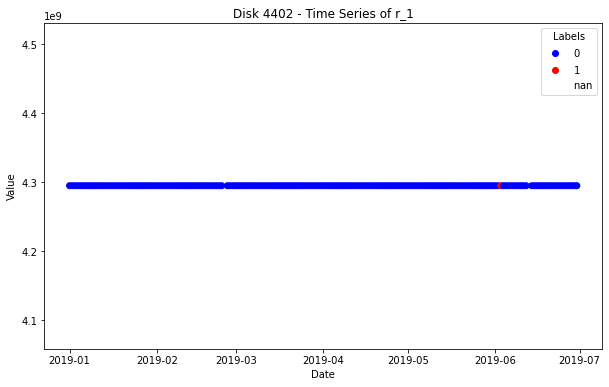

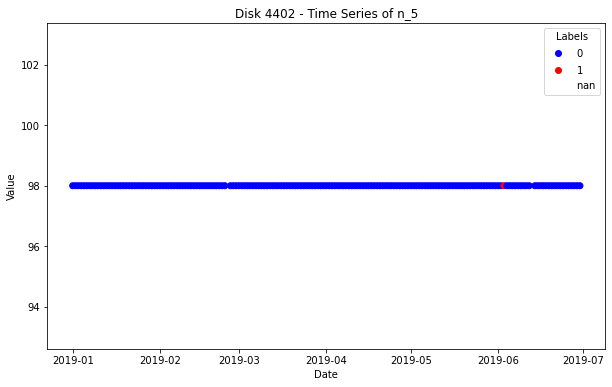

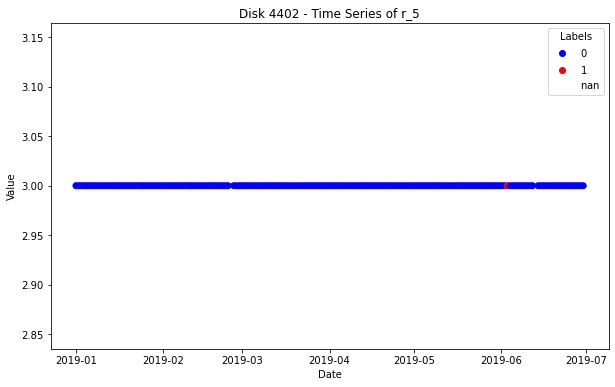

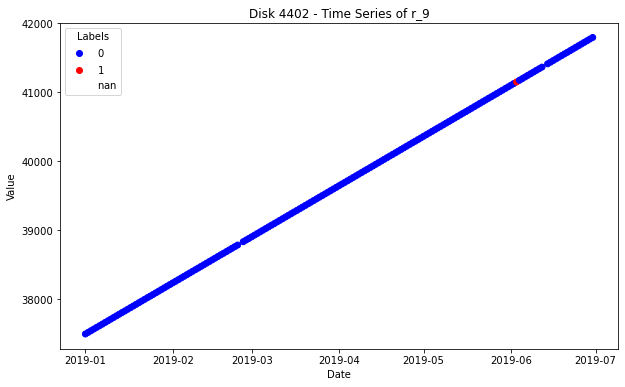

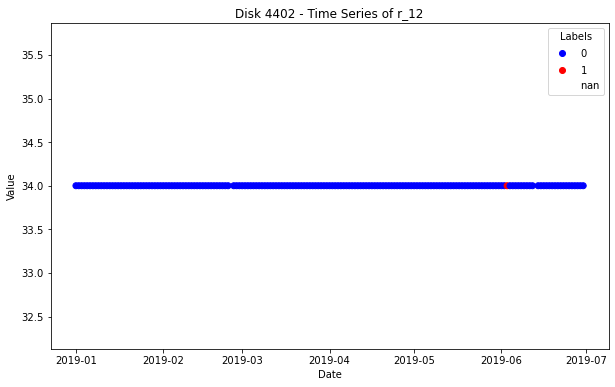

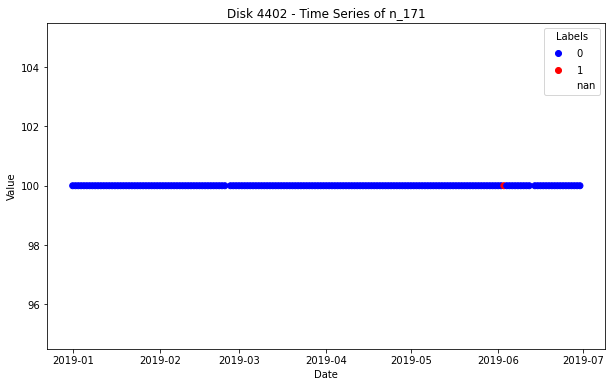

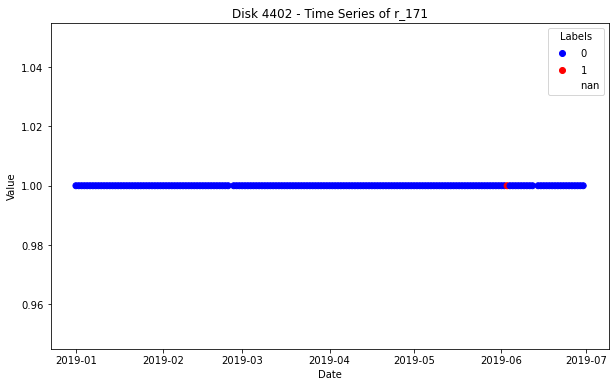

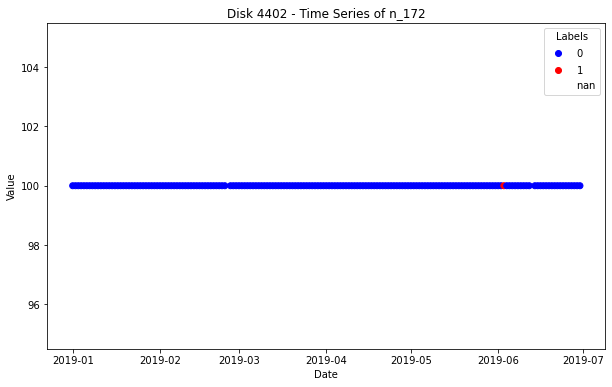

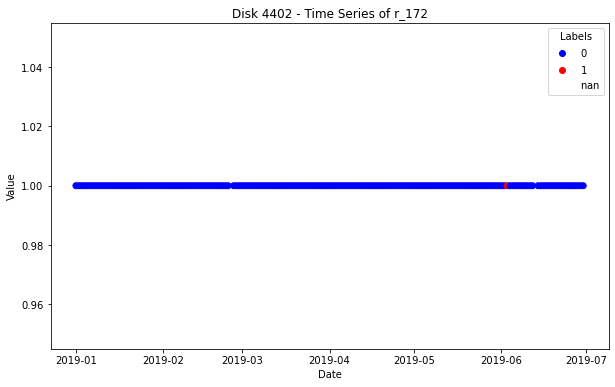

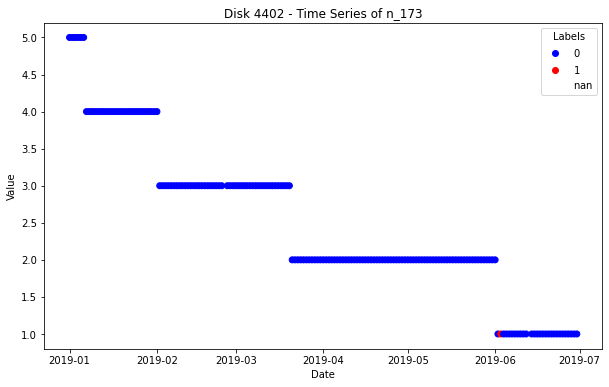

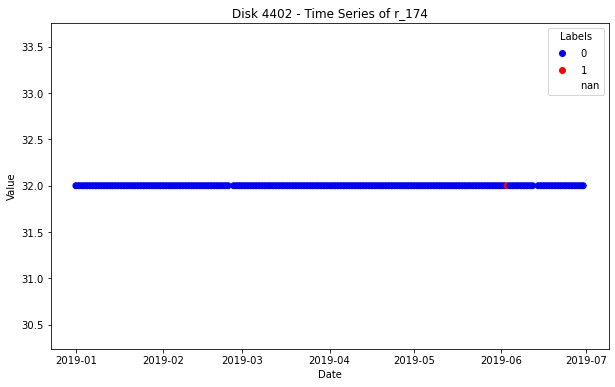

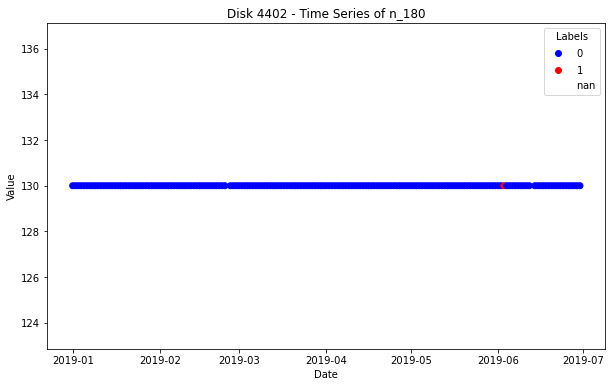

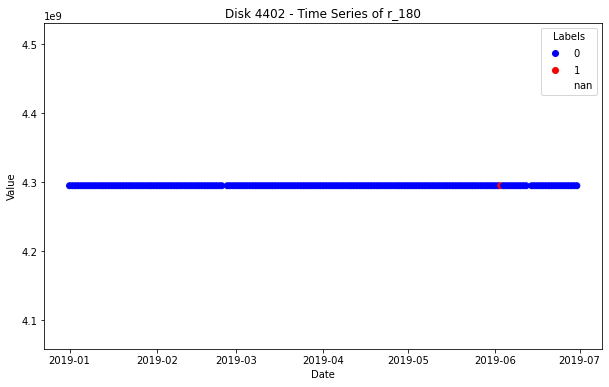

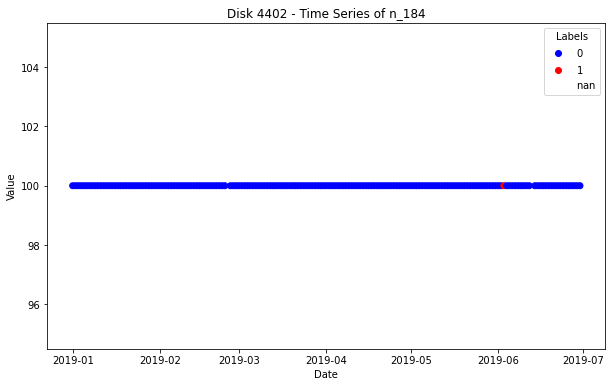

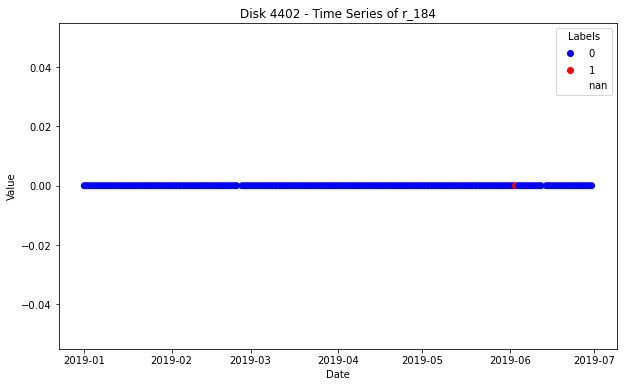

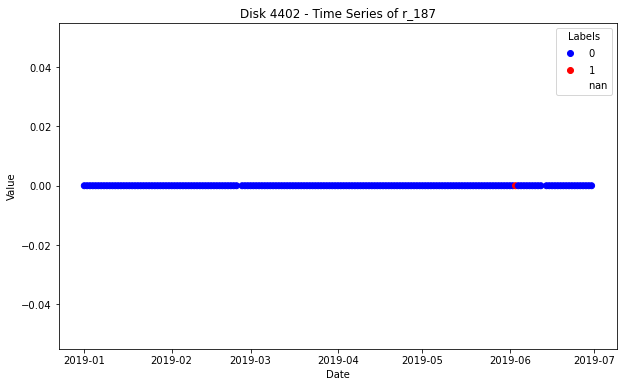

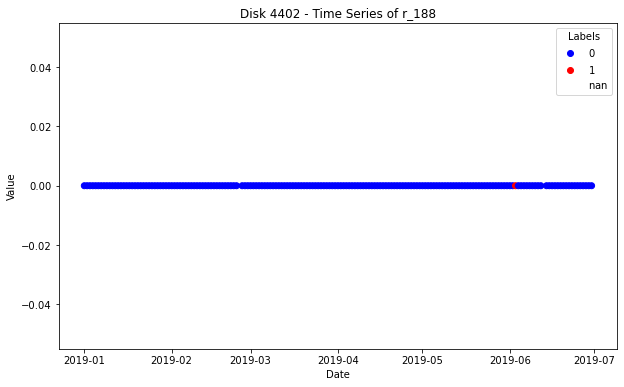

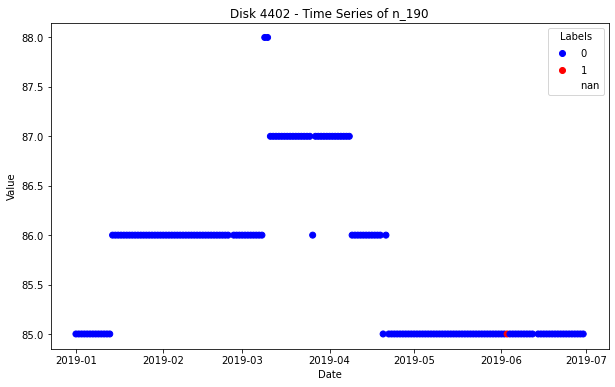

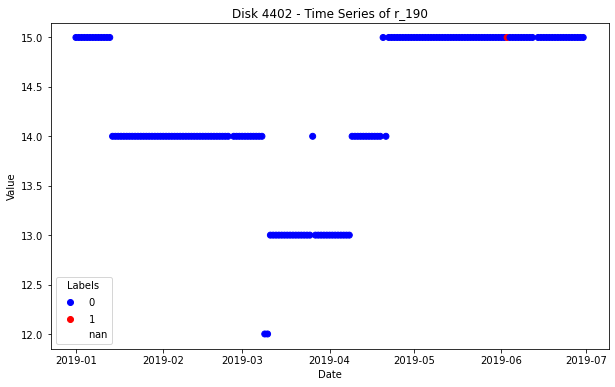

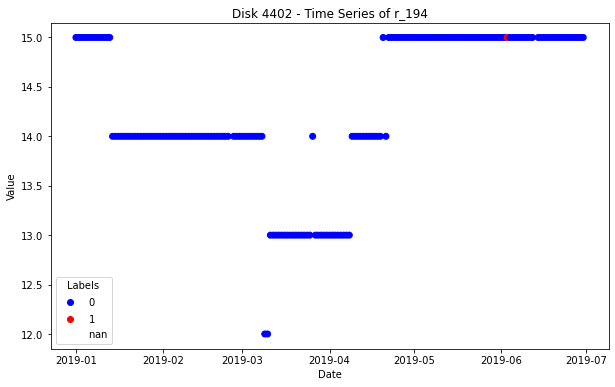

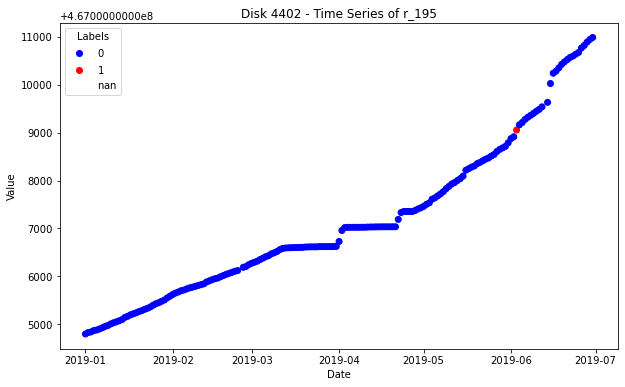

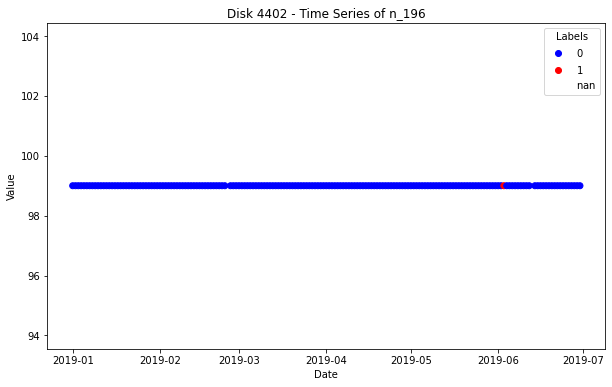

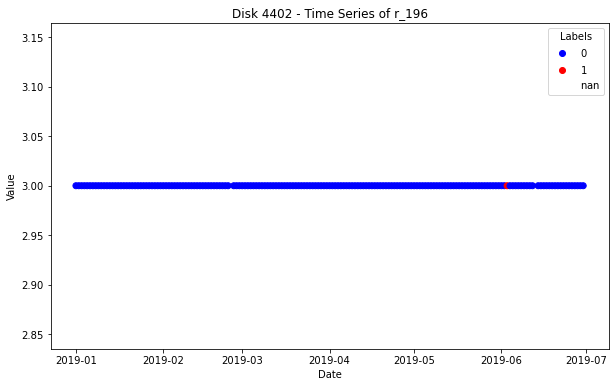

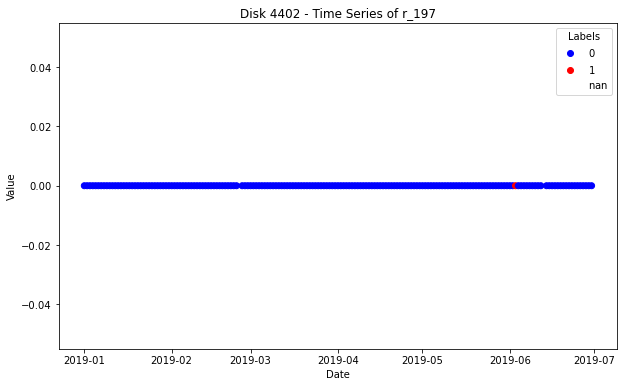

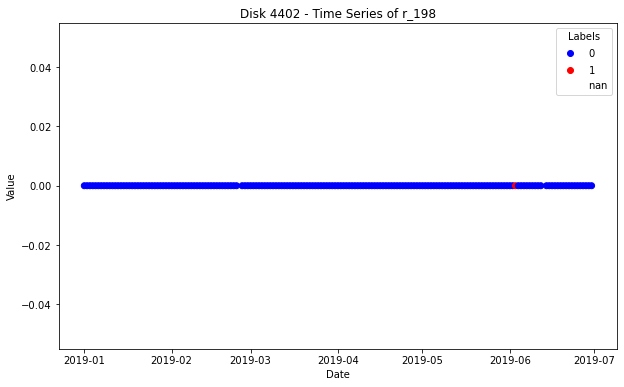

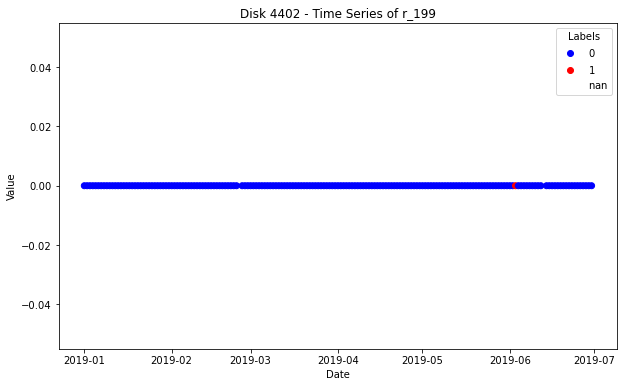

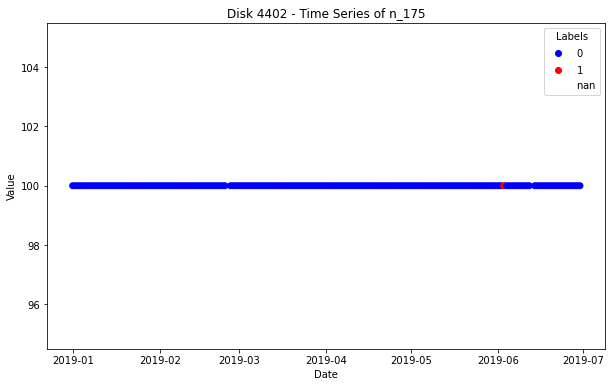

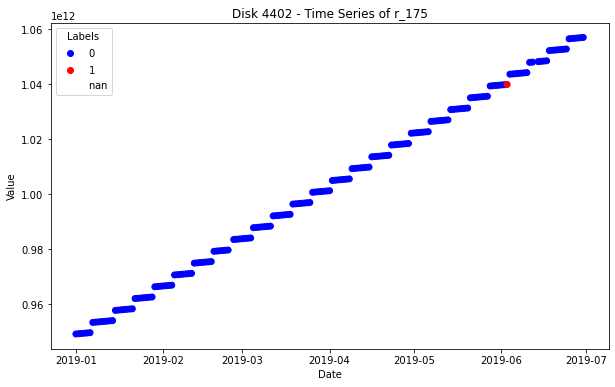

In [53]:
disk_id = 4402
features = ['r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_171', 'r_171',
       'n_172', 'r_172', 'n_173', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184',
       'r_187', 'r_188', 'n_190', 'r_190', 'r_194', 'r_195', 'n_196', 'r_196',
       'r_197', 'r_198', 'r_199', 'n_175', 'r_175']

filtered_df = data[data['disk_id'] == disk_id]

if filtered_df.empty:
    print(f"No data available for disk_id {disk_id}.")
else:
    # 날짜(ds)를 datetime 형식으로 변환
    filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')
    
    # 모든 날짜를 생성합니다.
    all_dates = pd.date_range(start=filtered_df['ds'].min(), end=filtered_df['ds'].max())
    
    # 모든 날짜를 포함하도록 filtered_df를 확장합니다.
    filtered_df = filtered_df.set_index('ds').reindex(all_dates).rename_axis('ds').reset_index()
    
    # label 결측치에 2를 할당합니다.
    filtered_df['label'] = filtered_df['label'].fillna(2)
    
    # 인덱스 재설정
    filtered_df = filtered_df.reset_index(drop=True)

    for feature in features:
        fig, ax = plt.subplots(figsize=(10, 6))
        sc = ax.scatter(filtered_df['ds'].values, filtered_df[feature].values, c=filtered_df['label'], cmap='bwr')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.set_title(f'Disk {disk_id} - Time Series of {feature}')
        ax.legend(*sc.legend_elements(), title="Labels")
        plt.show()

In [54]:
missing_dates = filtered_df[filtered_df[feature].isnull()]['ds']
print("Missing Dates:")
for date in missing_dates:
    print(date)

Missing Dates:
2019-02-25 00:00:00
2019-06-13 00:00:00


In [55]:
filtered_df

,ds,disk_id,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,2019-01-01,4402.0,4.294967e+09,98.0,3.0,37494.0,34.0,100.0,1.0,100.0,...,15.0,467004799.0,99.0,3.0,0.0,0.0,0.0,100.0,9.492870e+11,0.0
1,2019-01-02,4402.0,4.294967e+09,98.0,3.0,37518.0,34.0,100.0,1.0,100.0,...,15.0,467004829.0,99.0,3.0,0.0,0.0,0.0,100.0,9.493809e+11,0.0
2,2019-01-03,4402.0,4.294967e+09,98.0,3.0,37542.0,34.0,100.0,1.0,100.0,...,15.0,467004842.0,99.0,3.0,0.0,0.0,0.0,100.0,9.494749e+11,0.0
3,2019-01-04,4402.0,4.294967e+09,98.0,3.0,37566.0,34.0,100.0,1.0,100.0,...,15.0,467004871.0,99.0,3.0,0.0,0.0,0.0,100.0,9.495688e+11,0.0
4,2019-01-05,4402.0,4.294967e+09,98.0,3.0,37590.0,34.0,100.0,1.0,100.0,...,15.0,467004882.0,99.0,3.0,0.0,0.0,0.0,100.0,9.496627e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2019-06-26,4402.0,4.294967e+09,98.0,3.0,41698.0,34.0,100.0,1.0,100.0,...,15.0,467010766.0,99.0,3.0,0.0,0.0,0.0,100.0,1.056677e+12,0.0
177,2019-06-27,4402.0,4.294967e+09,98.0,3.0,41722.0,34.0,100.0,1.0,100.0,...,15.0,467010819.0,99.0,3.0,0.0,0.0,0.0,100.0,1.056771e+12,0.0
178,2019-06-28,4402.0,4.294967e+09,98.0,3.0,41746.0,34.0,100.0,1.0,100.0,...,15.0,467010889.0,99.0,3.0,0.0,0.0,0.0,100.0,1.056865e+12,0.0
179,2019-06-29,4402.0,4.294967e+09,98.0,3.0,41770.0,34.0,100.0,1.0,100.0,...,15.0,467010944.0,99.0,3.0,0.0,0.0,0.0,100.0,1.056959e+12,0.0


In [60]:
filtered_df['r_198'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
176    0.0
177    0.0
178    0.0
179    0.0
180    0.0
Name: r_198, Length: 181, dtype: float64>